# Sheet 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline
plt.rcParams['font.size'] = 9
plt.rcParams['figure.figsize'] = (12 / 2.54, 6 / 2.54)
plt.rcParams['figure.constrained_layout.use'] = True

## Regularization and Intercept

### (a)

$$ L_\lambda = \sum_{n=1}^N (y_n - \beta_0 - \beta_1 x_{1,n} - \beta_2 x_{2,n})^2 + \lambda (\beta_0^2 + \beta_1^2 + \beta_2^2) $$

The influence on $\beta_0$ is the same as for $\beta_1$ and $\beta_2$, thus a large intercept is penalized in the same way as large coefficients.

### (b)

Just remove the intercept $\beta_0^2$ from the regularization term:

$$ L_\lambda = \sum_{n=1}^N (y_n - \beta_0 - \beta_1 x_{1,n} - \beta_2 x_{2,n})^2 + \lambda (\beta_1^2 + \beta_2^2) $$

### (c)

- For (a) – Spheres $(\beta_0^2 + \beta_1^2 + \beta_2^2 = \text{const.})$
- For (b) – Cylinders infinitely extended in $\beta_0$ direction $(\beta_1^2 + \beta_2^2 = \text{const.})$

## $\sigma^2$ Estimation

### (a)

Using the normal distribution

$$ \mathcal{N} \left(y_n \mid \beta^T x_n, \sigma^2\right) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_n - \beta^T x_n)^2}{2\sigma^2} \right), $$

it follows for $\hat{\beta}$ the expression for the least squares estimate:

$$ \begin{aligned}
 \hat{\beta} &= \underset{\beta}{\rm arg\,max} \sum_{n=1}^N \log \mathcal{N} \left(y_n \mid \beta^T x_n, \sigma^2\right) \\
&= \underset{\beta}{\rm arg\,max} \sum_{n=1}^N \left[ -\cancel{\frac{1}{2} \log(2\pi\sigma^2)} - \cancel{\frac{1}{2\sigma^2}} (y_n - \beta^T x_n)^2 \right] \\
&= \underset{\beta}{\rm arg\,min} \sum_{n=1}^N (y_n - \beta^T x_n)^2. \\
\end{aligned}. $$

### (b)

The maximum likelihood estimate for $\sigma^2$ is given by

$$ \begin{aligned}
\hat{\sigma}^2 &= \underset{\sigma^2}{\rm arg\,max} \sum_{n=1}^N \log \mathcal{N} \left(y_n \mid \beta^T x_n, \sigma^2\right) \\
&= \underset{\sigma^2}{\rm arg\,max} \sum_{n=1}^N \left[ -\frac{1}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} (y_n - \beta^T x_n)^2 \right].
\end{aligned} $$

By taking the derivative of the sum with respect to $\sigma^2$ and setting it to zero, we get

$$ \begin{aligned}
0 = -\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{n=1}^N (y_n - \beta^T x_n)^2 \quad
\Longleftrightarrow \quad \hat{\sigma}^2 = \frac{1}{N} \sum_{n=1}^N (y_n - \beta^T x_n)^2.
\end{aligned} $$

This is equivalent to the mean of the squared residuals.

## Visualize Regularization Contours

x.shape: (2, 100), y.shape: (1, 100)


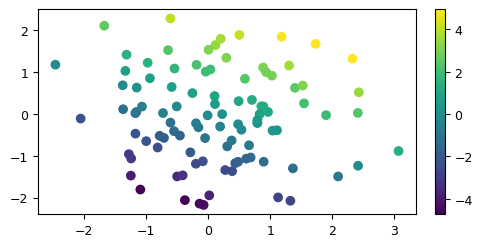

In [2]:
# load the data
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']
print(f'x.shape: {x.shape}, y.shape: {y.shape}')
plt.scatter(*x, c=y)
plt.colorbar()
plt.show()

In [3]:
# create a grid of points in the parameter space
b1, b2 = np.linspace(-1, 3, 101), np.linspace(-1, 3, 101)
bs = np.stack(np.meshgrid(b1, b2, indexing='ij'), axis=-1)
bs.shape

(101, 101, 2)

### (a)

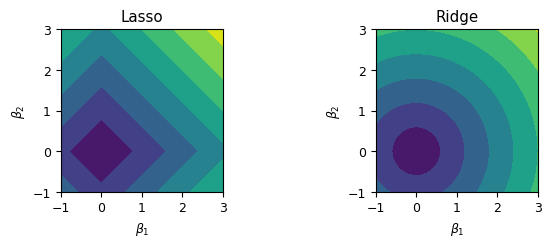

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16 / 2.54, 6 / 2.54))

ax1.contourf(bs[:, :, 0], bs[:, :, 1], np.linalg.norm(bs, ord=1, axis=-1))
ax2.contourf(bs[:, :, 0], bs[:, :, 1], np.linalg.norm(bs, ord=2, axis=-1))
ax1.set_title('Lasso')
ax2.set_title('Ridge')

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.set_xlabel('$\\beta_1$')
    ax.set_ylabel('$\\beta_2$')

### (b)

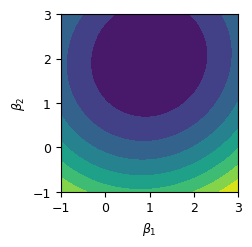

In [5]:
ssq = np.sum((y - (bs @ x))**2, axis=2)

plt.contourf(bs[:, :, 0], bs[:, :, 1], ssq)
plt.gca().set_aspect('equal')
plt.xlabel('$\\beta_1$')
plt.ylabel('$\\beta_2$')
plt.show()

### (c)

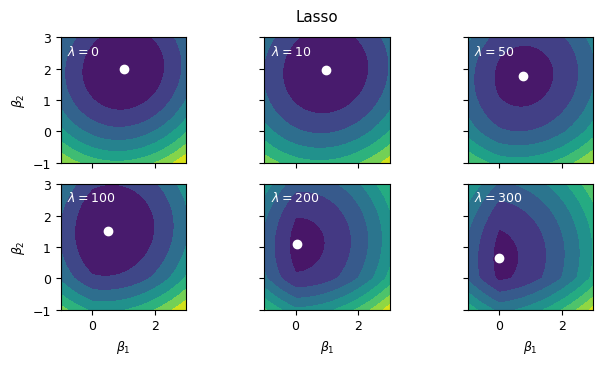

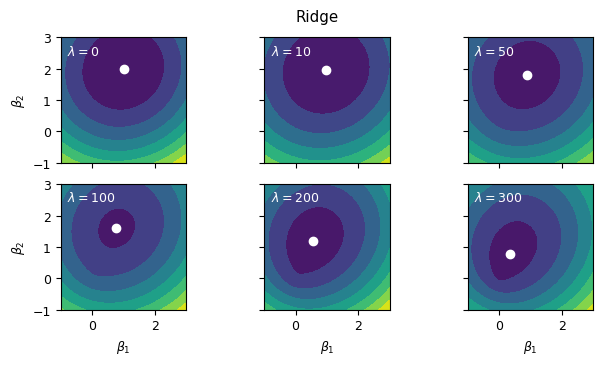

In [6]:
lambdas = [0, 10, 50, 100, 200, 300]

fig1, axs1 = plt.subplots(2, 3, figsize=(16 / 2.54, 9 / 2.54))
fig2, axs2 = plt.subplots(2, 3, figsize=(16 / 2.54, 9 / 2.54))

axs1 = axs1.flatten()
axs2 = axs2.flatten()

for i, lambd in enumerate(lambdas):
    lasso = lambd * np.linalg.norm(bs, ord=1, axis=-1)
    ridge = lambd * np.linalg.norm(bs, ord=2, axis=-1)
    axs1[i].contourf(bs[:, :, 0], bs[:, :, 1], ssq + lasso)
    axs2[i].contourf(bs[:, :, 0], bs[:, :, 1], ssq + ridge)

    min1 = np.unravel_index(np.argmin(ssq + lasso), ssq.shape)
    min2 = np.unravel_index(np.argmin(ssq + ridge), ssq.shape)
    axs1[i].scatter(*bs[min1], c='w')
    axs2[i].scatter(*bs[min2], c='w')

    for axs in (axs1, axs2):
        axs[i].set_aspect('equal')
        axs[i].set_xlabel('$\\beta_1$')
        axs[i].set_ylabel('$\\beta_2$')
        axs[i].label_outer()
        axs[i].text(0.05, 0.95, f'$\\lambda = {lambd}$',
                    transform=axs[i].transAxes, va='top', c='w')

fig1.suptitle('Lasso')
fig2.suptitle('Ridge')

plt.show()

We can see that in Lasso regularization, the contours get more diamond-shaped as $\lambda$ increases, and the corner points become visible. Also, the minimum of $\beta_1$ gets pushed to zero more quickly than in Ridge regularization, where the minimum is moved more smoothly and the contours stay more round. This shows that Lasso regularization can lead to sparse solutions.

## CT Reconstruction

First, set up the design matrix. (Run this once to save it to the disk)

In [7]:
# create design matrix
# don't change any of this, just run it once to create and save the design matrix
import os

n_parallel_rays = 70 
n_ray_angles = 30
res = (99, 117)
print("Number of pixels in the 2d image:", np.prod(res))
print("Total number of rays:", n_parallel_rays * n_ray_angles)

def rot_mat(angle):
    c, s = np.cos(angle), np.sin(angle)
    return np.stack([np.stack([c, s], axis=-1), np.stack([-s, c], axis=-1)], axis=-1)

kernel = lambda x: np.exp(-x**2/sigma**2/2)

if not os.path.exists('data/design_matrix.npy'):
    xs = np.arange(0, res[1]+1) - res[1]/2 # np.linspace(-1, 1, res[1] + 1)
    ys = np.arange(0, res[0]+1) - res[0]/2 # np.linspace(-1, 1, res[0] + 1)

    # rays are defined by origin and direction
    ray_offset_range = [-res[1]/1.5, res[1]/1.5]
    n_rays = n_parallel_rays * n_ray_angles

    ray_angles = np.linspace(0, np.pi, n_ray_angles, endpoint=False) + np.pi/n_ray_angles

    # offsets for ray_angle = 0, i.e. parallel to x-axis
    ray_0_offsets = np.stack([np.zeros(n_parallel_rays), np.linspace(*ray_offset_range, n_parallel_rays)], axis=-1)
    ray_0_directions = np.stack([np.ones(n_parallel_rays), np.zeros(n_parallel_rays)], axis=-1)

    

    ray_rot_mats = rot_mat(ray_angles)

    ray_offsets = np.einsum('oi,aij->aoj', ray_0_offsets, ray_rot_mats).reshape(-1, 2)
    ray_directions = np.einsum('oi,aij->aoj', ray_0_directions, ray_rot_mats).reshape(-1, 2)

    sigma = 1
    xsc = (xs[1:] + xs[:-1]) / 2
    ysc = (ys[1:] + ys[:-1]) / 2
    b = np.stack(np.meshgrid(xsc, ysc), axis=-1).reshape(-1, 2)
    a = ray_offsets
    v = ray_directions
    v = v / np.linalg.norm(v, axis=-1, keepdims=True)
    p = ((b[None] - a[:, None]) * v[:, None]).sum(-1, keepdims=True) * v[:, None] + a[:, None]
    d = np.linalg.norm(b - p, axis=-1)
    d = kernel(d)
    design_matrix = d.T

    np.save('data/design_matrix.npy', design_matrix)
    print(f'created and saved design matrix of shape {design_matrix.shape} at data/design_matrix.npy')

Number of pixels in the 2d image: 11583
Total number of rays: 2100


sino shape: (1, 2100)


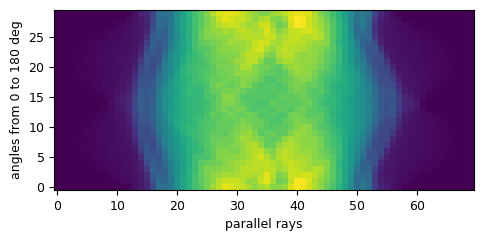

In [8]:
sino = np.load('data/sino.npy')

print(f'sino shape: {sino.shape}')

# visualize sinogram as image
n_parallel_rays = 70
n_angles = 30
plt.imshow(sino.reshape(n_angles, n_parallel_rays), origin='lower')
plt.xlabel('parallel rays')
plt.ylabel('angles from 0 to 180 deg')
plt.show()

### (a)

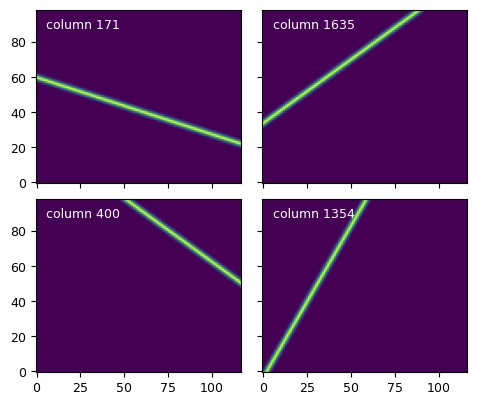

In [ ]:
design_matrix = np.load('data/design_matrix.npy')

fig, axs = plt.subplots(2, 2, figsize=(12 / 2.54, 10 / 2.54), sharex=True, sharey=True)
for ax, i in zip(axs.flatten(), np.random.choice(design_matrix.shape[1], 4)):
    ax.imshow(design_matrix[:, i].reshape(99, 117), origin='lower')
    ax.text(0.05, 0.95, f'column {i}', transform=ax.transAxes, va='top', c='w')

These are images showing all cells/pixels that are affected by a single ray.

### (b)

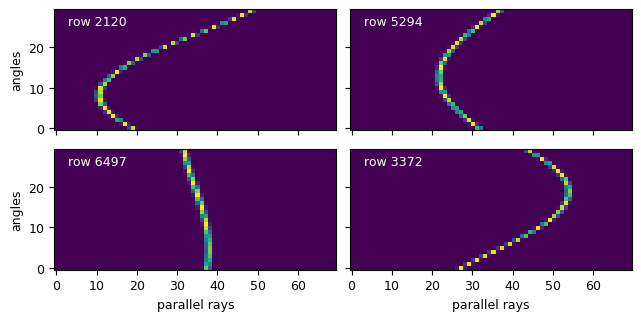

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16 / 2.54, 8 / 2.54))

for ax, i in zip(axs.flatten(), np.random.choice(design_matrix.shape[0], 4)):
    ax.imshow(design_matrix[i, :].reshape(30, 70), origin='lower')
    ax.text(0.05, 0.95, f'row {i}', transform=ax.transAxes, va='top', c='w')
    ax.set_xlabel('parallel rays')
    ax.set_ylabel('angles')
    ax.label_outer()

These are the sinograms of images where only a single cell/pixel is "on" and all others are "off". We can see which rays go through a cell and under which angle.

### (c)

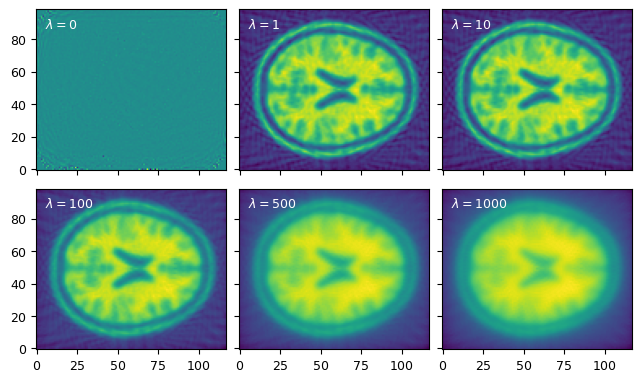

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(16 / 2.54, 9.5 / 2.54), sharex=True, sharey=True)
axs = axs.flatten()
lambdas = [0, 1, 10, 100, 500, 1000]

for ax, lambd in zip(axs, lambdas):
    model = Ridge(alpha=lambd) if lambd > 0 else LinearRegression()
    model.fit(design_matrix.T, sino.T)
    
    reconstruction = model.coef_.reshape(99, 117)
    ax.imshow(reconstruction, origin='lower')
    ax.text(0.05, 0.95, f'$\\lambda = {lambd}$', transform=ax.transAxes, va='top', c='w')

With increasing regularization strength $\lambda$, the image becomes more and more blurred, but without regularization, the image is purely noise.

## Bonus: X-Ray Free-Electron Lasers

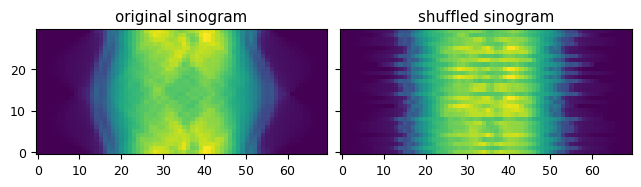

In [15]:
sino = np.load('data/sino.npy').reshape(n_angles, n_parallel_rays)
sino_shuffled = np.random.permutation(sino)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16 / 2.54, 6 / 2.54), sharey=True)
ax1.imshow(sino, origin='lower')
ax2.imshow(sino_shuffled, origin='lower')
ax1.set_title('original sinogram')
ax2.set_title('shuffled sinogram')

plt.show()

Start with a random row. Then find the row, where the sum of the squared differences is minimal. This is the row that is most similar to the random row. As we assume that the sinogram is continuous, the next row will be the one that is most similar to the row that was most similar to the random row. This process is repeated until all rows are used.

In [16]:
used_rows = [0]

while len(used_rows) < len(sino_shuffled):
    i = used_rows[-1]
    ssq = np.linalg.norm(sino_shuffled - sino_shuffled[i], ord=2, axis=1)
    ind = np.argsort(ssq)
    used_rows.append(ind[~np.isin(ind, used_rows)][0])

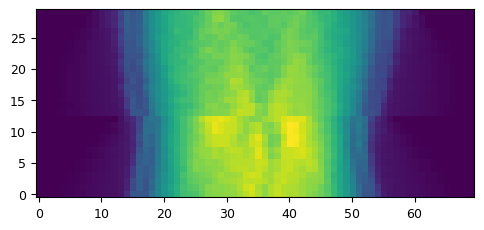

In [17]:
plt.imshow(sino_shuffled[used_rows], origin='lower')
plt.show()

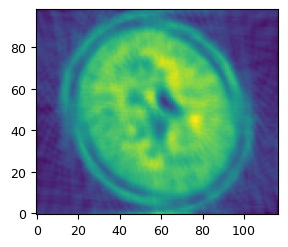

In [18]:
model = Ridge(alpha=100).fit(design_matrix.T, sino_shuffled[used_rows].reshape(-1, 1))
reconstruction = model.coef_.reshape(99, 117)

plt.imshow(reconstruction, origin='lower')
plt.show()

That didn't work so well but at least it's round...